In [16]:
import sys
import os
from typing import List, Dict, Optional, Tuple, Callable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

sys.path.append(os.path.abspath("../src"))
from data_loader import EmotionDataset, DatasetConfig
from utils.visualization import PlotSplitedDataHistogram

import warnings
warnings.filterwarnings ('ignore')
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings(action="ignore"):
    fxn()

In [2]:
# Parameters
DATA_ROOT = "D:\Projects\Technion\SpeechEmotionRecognition\data"
SR = 6000 # 22050
FIX_SECS = 3
# MAX_FILES = 13000

In [3]:
# Dataset
ds_cfg = DatasetConfig(
    data_root = DATA_ROOT,
    target_sr = SR,
    fixed_frames = FIX_SECS * SR
)
ds_work = EmotionDataset(ds_cfg)
print(f"Discovered {len(ds_work)} files.")

Discovered 12162 files.


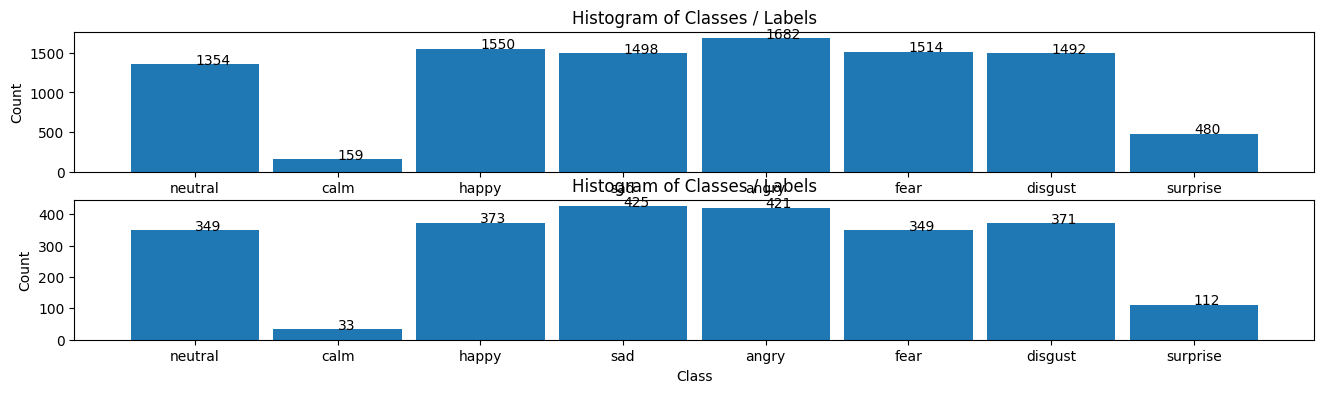

In [14]:
# Data filenames split
labels = pd.DataFrame(ds_work.labels, columns=['Emotion'])
labels = labels.to_numpy()
train_fs, test_fs, train_labels, test_labels = train_test_split(ds_work.paths, labels, train_size = 0.8, random_state = 512)
labels_list = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']
PlotSplitedDataHistogram(train_labels, test_labels, labels_list)

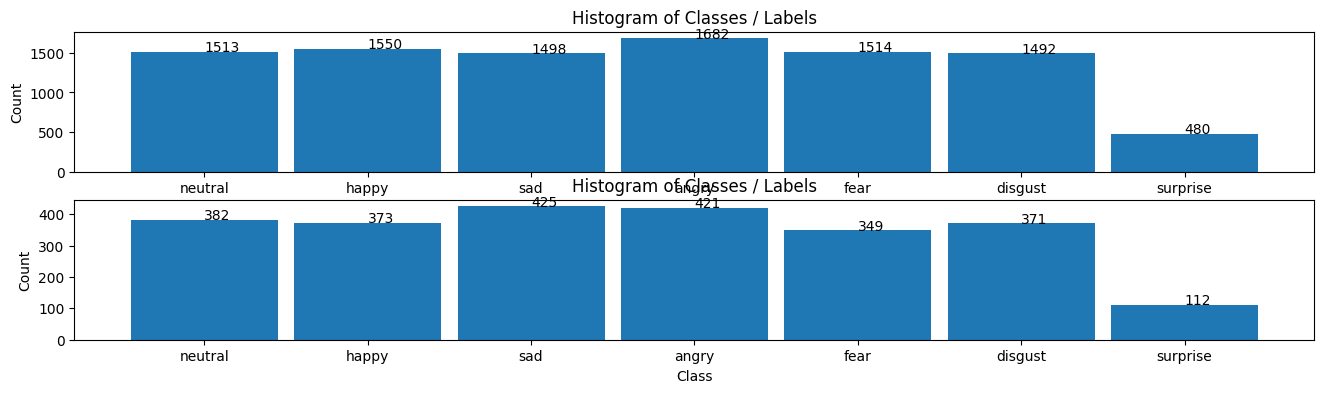

In [17]:
# Combine some labels: Poor difference is found between "Neutal" and "Calm" emotions
labels = pd.DataFrame(ds_work.labels, columns=['Emotion'])
labels['Emotion'].replace({0:0, 1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 7:6}, inplace=True)
labels = labels.to_numpy()
train_fs, test_fs, train_labels, test_labels = train_test_split(ds_work.paths, labels, train_size = 0.8, random_state = 512)
labels_list = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']
PlotSplitedDataHistogram(train_labels, test_labels, labels_list)